In [ ]:
import numpy as np

from modules.wave_equation import solve_wave_equation
from modules.diffusion_equation import (
    calc_diffusion,
    animate_diffusion,
    plot_concentration,
    plot_grid,
    init_grid,
    jacobi,
    gauss_seidel,
    delete_files
)

----------
## 1.1
We'll explore how to numerically solve the one-dimensional wave equation using different initial conditions

In [ ]:
def init_one(x_vec):
    return np.sin(2 * np.pi * x_vec)


def init_two(x_vec):
    return np.sin(5 * np.pi * x_vec)


def init_three(x_vec):
    return np.sin(5 * np.pi * x_vec) * ((1 / 5 < x_vec) & (x_vec < 2 / 5))

In [ ]:
L, T = 1.0, 1.0
N_SPATIAL_STEPS, N_TIME_STEPS = 1000, 1000
c = 1.0

solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_one,
    N_lines=3,
    save_location="results/wave_equation_one",
)

In [ ]:
solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_two,
    save_location="results/wave_equation_two",
)

In [ ]:
solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_three,
    save_location="results/wave_equation_three",
)

In [ ]:
solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_one,
    animate=True,
    save_location="results/wave_equation_one",
)
solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_one,
    animate=True,
    save_location="results/wave_equation_two",
)
solve_wave_equation(
    L,
    T,
    N_SPATIAL_STEPS,
    N_TIME_STEPS,
    c,
    init_one,
    animate=True,
    save_location="results/wave_equation_three",
)


----------
## 1.2

In [ ]:
N = 50
D = 1.0
dx = 1.0 / N
dt = 0.001
steps = 1_000_000
times = [0.001, 0.01, 0.1, 1.0]
calc_diffusion(N, steps, D, dx, dt)

plot_concentration(steps, times)

In [ ]:
plot_grid(times=[0.001, 0.01, 0.1, 1.0])

In [ ]:
plot_grid()

In [ ]:
animate_diffusion(steps=steps, skips=1000, save_animation=True)

----------
## 1.4 Jacobi

In [1]:
import numpy as np

from modules.wave_equation import solve_wave_equation
from modules.diffusion_equation import (
    calc_diffusion,
    animate_diffusion,
    plot_concentration,
    plot_grid,
    init_grid,
    jacobi,
    gauss_seidel,
    delete_files
)

The number of iterations needed for Jacobi method is 2421


Animating diffusion: 1214it [00:38, 31.76it/s]                           


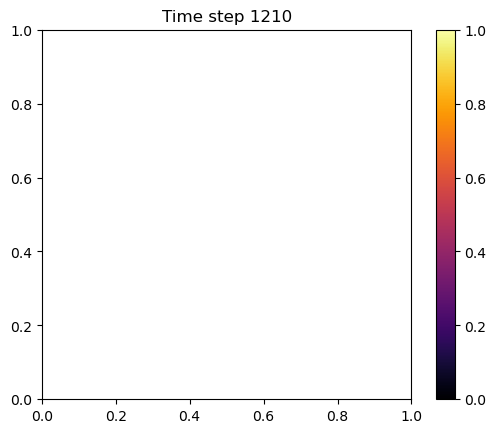

In [3]:
max_iters = 100000
epsilon = 1e-4
N = 100

grid = init_grid(N)

jacobi_results = jacobi(grid, epsilon, max_iters)
jacobi_results = np.array(jacobi_results)


print(f"The number of iterations needed for Jacobi method is {len(jacobi_results)}")
animate_diffusion(jacobi_results, save_animation=True)

----------
## 1.5 Gauss-Seidel

In [ ]:
max_iters = 100000
epsilon = 1e-4
N = 100

grid = init_grid(N)

gauss_seidel_results = gauss_seidel(grid, epsilon, max_iters)
gauss_seidel_results = np.array(gauss_seidel_results)

print(
    f"The number of iterations needed for Gauss-Seidel method is {len(gauss_seidel_results)}"
)
animate_diffusion(gauss_seidel_results)